In [1]:
import statistics
import numpy as np 
import pandas as pd 


In [2]:
datas = pd.read_csv('cleaned_round_2.csv')
datas

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649
...,...,...,...,...,...,...,...
29998,2999800,1036.25,0.9,9.5,-5.0,2299.9436,69.93549
29999,2999900,1036.25,0.9,9.5,-5.0,2299.9556,69.95153
30000,3000000,1036.25,0.9,9.5,-5.0,2299.9690,69.96762
30001,3000100,1034.25,0.9,9.5,-5.0,2299.9840,69.98378


In [3]:
sunlight = datas['SUNLIGHT']
humidity = datas['HUMIDITY']
orchids = datas['ORCHIDS']

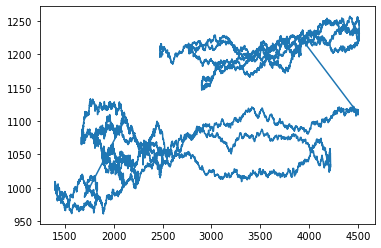

In [5]:
import matplotlib.pyplot as plt
plt.plot(sunlight, orchids)

112.5 -116.25
[[ 8.32437983e+05 -2.65257232e+00]
 [-2.65257232e+00  1.92812432e+00]]


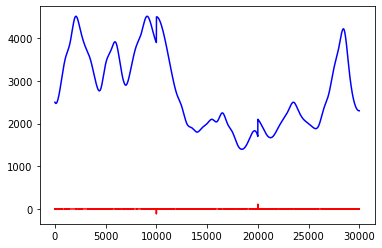

In [25]:
orchid_diff = orchids.diff().dropna()
sunlight_steps = sunlight[1:]
#print(len(sunlight_steps), len(orchid_diff))
x = range(len(sunlight_steps))
plt.plot(x, sunlight_steps, color = 'b')
plt.plot(x, orchid_diff, color = 'r')
print(max(orchid_diff), min(orchid_diff))
print(np.cov(sunlight_steps, orchid_diff))

In [29]:
sunlight_adj = [2500-val for val in sunlight]
for val in sunlight_adj:
    if val < 0:
        val = 0
humid_adj = []
for val in humidity:
    if val < 60:
        humid_adj.append(60-val)
    elif val > 80:
        humid_adj.append(val - 80)
    else:
        humid_adj.append(0)
sunlight_adj, humid_adj



([0.0,
  0.5803000000000793,
  1.1543000000001484,
  1.7220000000002074,
  2.2833999999998014,
  2.838600000000042,
  3.387499999999818,
  3.930199999999786,
  4.466600000000199,
  4.996799999999894,
  5.520799999999781,
  6.03859999999986,
  6.550000000000182,
  7.055400000000191,
  7.554700000000139,
  8.047900000000027,
  8.534700000000157,
  9.015400000000227,
  9.489999999999782,
  9.958500000000186,
  10.420999999999822,
  10.876999999999953,
  11.327099999999973,
  11.771200000000135,
  12.209199999999782,
  12.641000000000076,
  13.067000000000007,
  13.48660000000018,
  13.90039999999999,
  14.30789999999979,
  14.709699999999884,
  15.105199999999968,
  15.494900000000143,
  15.878400000000056,
  16.255999999999858,
  16.627700000000004,
  16.993399999999838,
  17.353000000000065,
  17.70679999999993,
  18.05470000000014,
  18.396499999999833,
  18.73239999999987,
  19.0625,
  19.38670000000002,
  19.704799999999977,
  20.017299999999977,
  20.323699999999917,
  20.6244999999

In [10]:
print(min(sunlight),max(sunlight),statistics.mean(sunlight),statistics.median(sunlight),statistics.stdev(sunlight))
print(min(humidity),max(humidity),statistics.mean(humidity),statistics.median(humidity),statistics.stdev(humidity))

1397.3049 4513.9863 2777.0732790154316 2498.0662 912.3665906871776
59.99958 97.51327 79.07356219934674 78.57902 9.366056692320754


In [ ]:
sunlight = [val - 60 for val in sunlight]

In [ ]:
len(sunlight)

In [48]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=True)
X = np.vstack([sunlight_adj, humid_adj]).reshape(30003, -1)
model.fit(X, orchids)
print("Intercept: ", model.intercept_)
print("Coefficients: ", model)
print("R^2 Value: ", model.score(X, orchids))

Intercept:  1099.047646026637
Coefficients:  LinearRegression()
R^2 Value:  0.0724890857159185
